In [842]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression


In [843]:
df = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [844]:
df.drop(columns="Volume", inplace=True)
df.drop(columns="Open", inplace=True)
df.drop(columns="High", inplace=True)
df.drop(columns="Low", inplace=True)
df.drop(columns="Adj Close", inplace=True)

df.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


,Date,Close,Ordinal_date
0,2010-06-29,4.778,733952
1,2010-06-30,4.766,733953
2,2010-07-01,4.392,733954
3,2010-07-02,3.840,733955
4,2010-07-06,3.222,733959


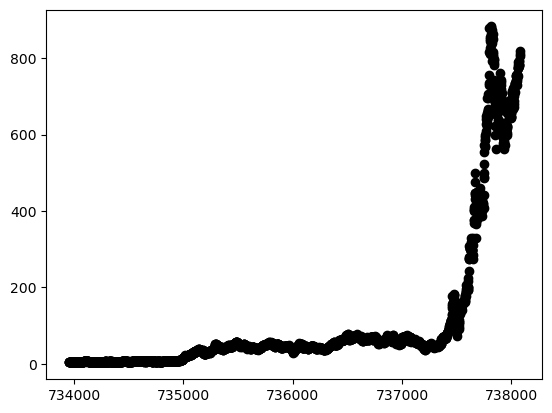

In [845]:
df['Date'] = pd.to_datetime(df['Date'])
df['Ordinal_date'] = df['Date'].map(dt.datetime.toordinal)

plt.scatter(df['Ordinal_date'], df['Close'], color='black')
df.head()

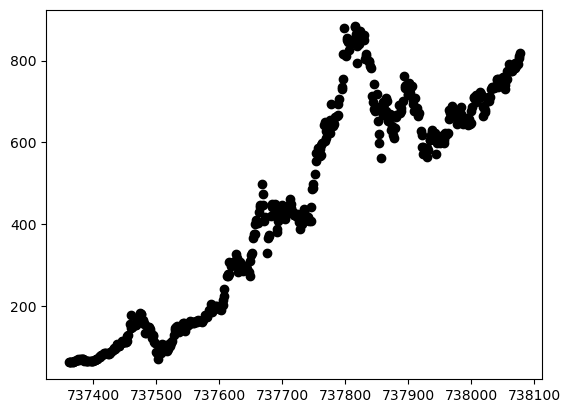

In [846]:
df = df.drop(df.index[range(0, 2350)])

plt.scatter(df['Ordinal_date'], df['Close'], color='black')

In [847]:
x = df[['Ordinal_date']]
y = df['Close']

In [848]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [849]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [850]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [851]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [852]:
y_pred = model.predict(x_train)

In [853]:
#r2 = metrics.r2_score(y_test, y_pred)
#print('R^2:', r2)

mse = metrics.mean_squared_error(y_train, y_pred)
print('MSE:', mse)

mae = metrics.mean_absolute_error(y_train, y_pred)
print('MAE:', mae)

MSE: 9588.358091055092
MAE: 71.70182686042402


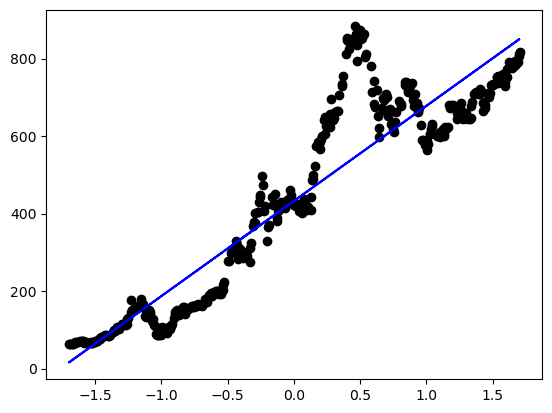

In [854]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, y_pred, color='blue')
plt.show()

In [855]:
def convert_date(date):
    date = pd.to_datetime(date)
    final_date = date.toordinal()
    return final_date

In [856]:
def standard_date(date):
    standard_date = pd.DataFrame([[date]])
    standard_date = scaler.transform(standard_date)
    return standard_date

In [857]:
def predict(date):
    date_converted = convert_date(date)
    standardized_date = standard_date(date_converted)
    final_price_prediction = model.predict(standardized_date)
    print(f'Prediction for {date}: {final_price_prediction[0]}')


In [861]:
prediction_date = '2020-08-05'
final_prediction = predict(prediction_date)

Prediction for 2020-08-05: 343.5455786365237
